In [1]:
from neo4j import GraphDatabase, basic_auth
import networkx as nx

In [2]:
driver = GraphDatabase.driver(
  "bolt://3.235.137.154:7687",
  auth=basic_auth("neo4j", "mast-sevenths-handful"))

In [3]:
query = """
MATCH (n)-[r]->(c) RETURN *
"""

results = driver.session().run(query)

In [4]:
G = nx.MultiDiGraph()

nodes = list(results.graph()._nodes.values())
for node in nodes:
    G.add_node(node.id, labels=node._labels, properties=node._properties)

rels = list(results.graph()._relationships.values())
for rel in rels:
    G.add_edge(rel.start_node.id, rel.end_node.id, key=rel.id, type=rel.type, properties=rel._properties)

In [5]:
len(G) #not sure why this fails

1827

In [6]:
list(G.nodes())[:10]

[4, 2073, 6, 2072, 7, 2076, 12, 2074, 2075, 14]

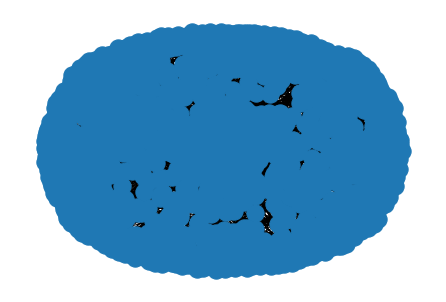

In [12]:
nx.draw(G)

In [13]:
driver.close()